# **Bank Marketing Analysis** 
## **Assignment-1 : ML Data Cleaning and Feature Selection**
*For DSEM- Spring 2022*











It's the year 2008, and a little Bank in Portugal decided to scale up and get more customers, following this idea they decided to call potential customers and talk them into subscibing to their term deposit.\
Fast forward to 2023, A grad student trying to learn about Data Science picks the dataset to analyse all that happened then and determine what lead to the success(or absolute failure) of this campaign.\
Feels like a Netflix show where we're going back in time, On second thought... why not make it just that?!\
So brace yourself for this journey, "I'm your Captain speaking, All aboard the SkunksShip! our destination is Portugal 2003, and Data Science will be our Quantum time travel with an objective to predict whether a customer will subscribe the bank's proposed product or not"

## **Story of the Data...**

The data was obtained from the UCI website and is completely open source and free for use, here's the link below

https://archive.ics.uci.edu/ml/datasets/bank+marketing



Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets:

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Attribute Information:

Input variables:
## Bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

## Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

## Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

Boarding all the gear on our Python-Spaceship for an adventure hunt to find the truth about a galaxy called BankMarketingData. (Couldn't come up with a cooler name)

*In a robotic voice*: "Importing Libraries"

In [549]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from matplotlib import pyplot
import os
import matplotlib
matplotlib.use(u'nbAgg')
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

Let's have a look at what this galaxy has in store for us!

*Reading the data*

In [550]:
data = pd.read_csv("https://raw.githubusercontent.com/Varadmurty-mohod/Bank-Marketing-Analysis/main/bank-additional-full-processed.csv")

Displaying the map of this galaxy in a table with cool colours, because why not?

In [551]:
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "font-style: italic; color: grey; font-weight:normal;"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #301934; color: white;"
}

data.head(30).style.set_table_styles([cell_hover, index_names, headers])


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


Checking for null values, because who wants to explore empty parts, just boring.

In [552]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Luckily there are no missing values in the dataset.

In [553]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [554]:
data.shape

(41188, 21)

In [555]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

No missing values, but there do seem to be some duplicates. Let's take care of those.

In [556]:
# Defining the duplicates
duplicates = data[data.duplicated(keep='last')]
duplicates

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [557]:
# Dropping duplicates
data = data.drop_duplicates()

In [558]:
data.shape

(41176, 21)

Looks good, we have plenty of data after dropping too.

In [559]:
print(data["y"].value_counts())

no     36537
yes     4639
Name: y, dtype: int64


# **Plotting Features to Understand them better**

Let's start with yes and no plots, since our analysis is based on whether the customer said 'yes' or 'no', and we'll compare features with the response to understand their significance towards the prediction.

<IPython.core.display.Javascript object>

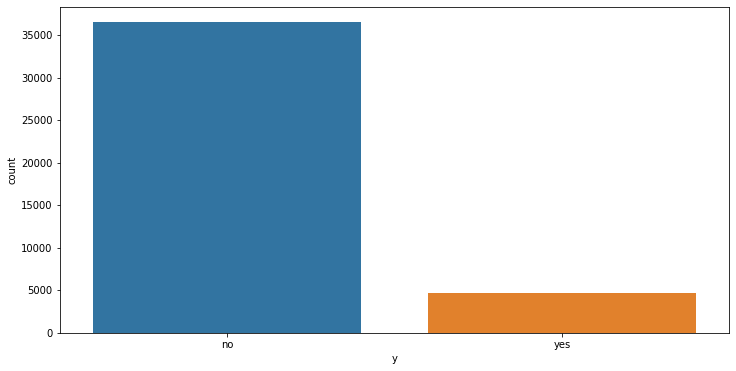

In [560]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=data['y'], ax=ax)

absolute_value = data['y'].value_counts()
relative_value = data['y'].value_counts(normalize=True) * 100


plt.show();

Lot's of rejections! Ouch, but oh well that's life. On the bright side, there are a good amount of yes in there, but the graph above does visualise it for us that the data is not balanced in proportions.

In [561]:
def countplot(label, dataset):
  plt.figure(figsize=(15,6))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  plt.show()

In [562]:
%matplotlib inline

def countplot_withYN(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  plt.show()

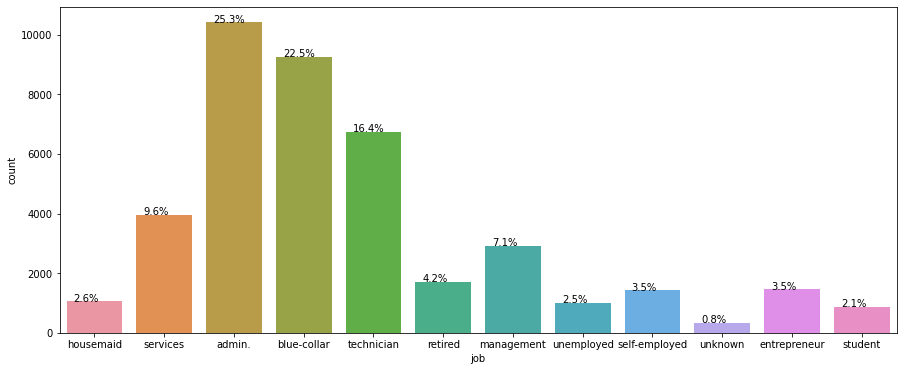

In [563]:
countplot("job", data)

From the above plot, we can deduct that Admin, Blue-Collar and Technician are the biggest targeted job categories.

Let's plot out the job profiles with yes and no percentages, this should give us more insight into how each job category reacted to the campaign calls.

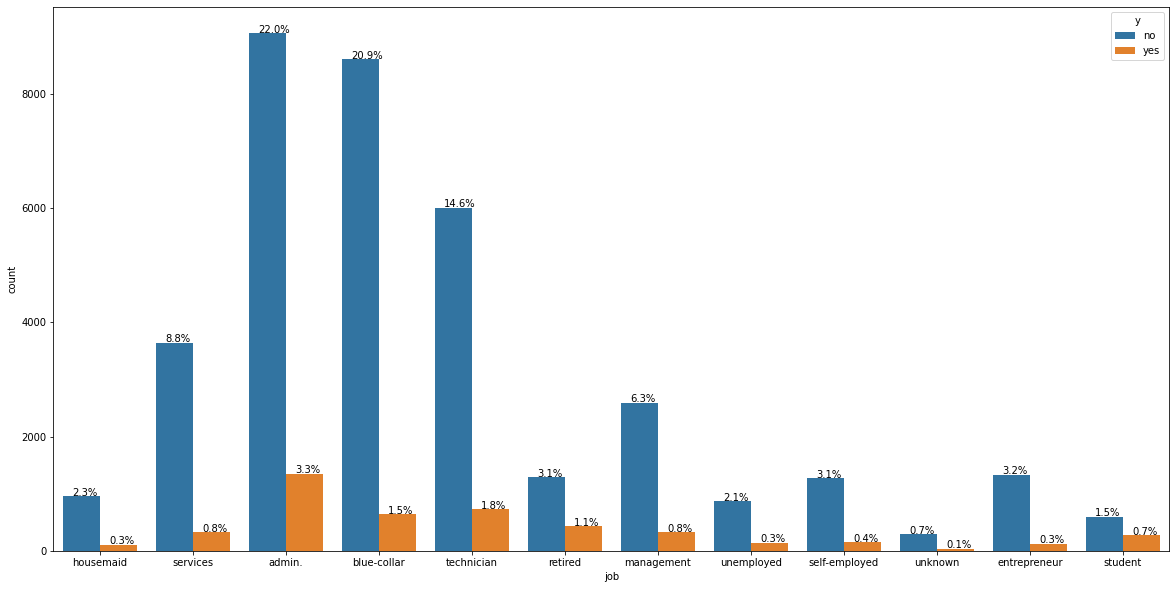

In [564]:
countplot_withYN("job", data)

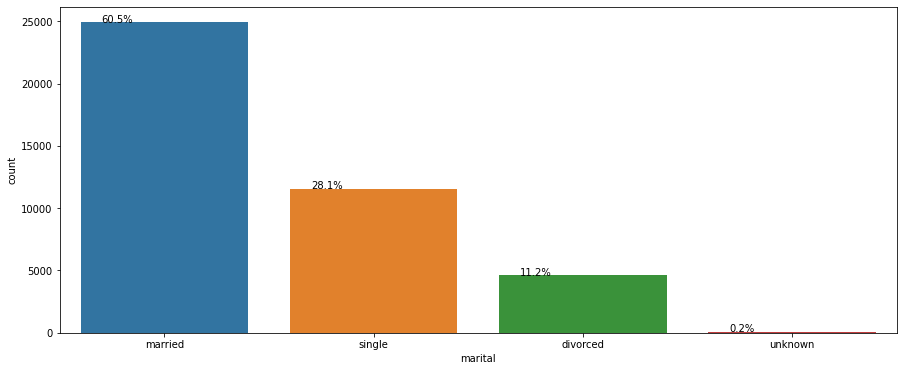

In [565]:
countplot("marital", data)

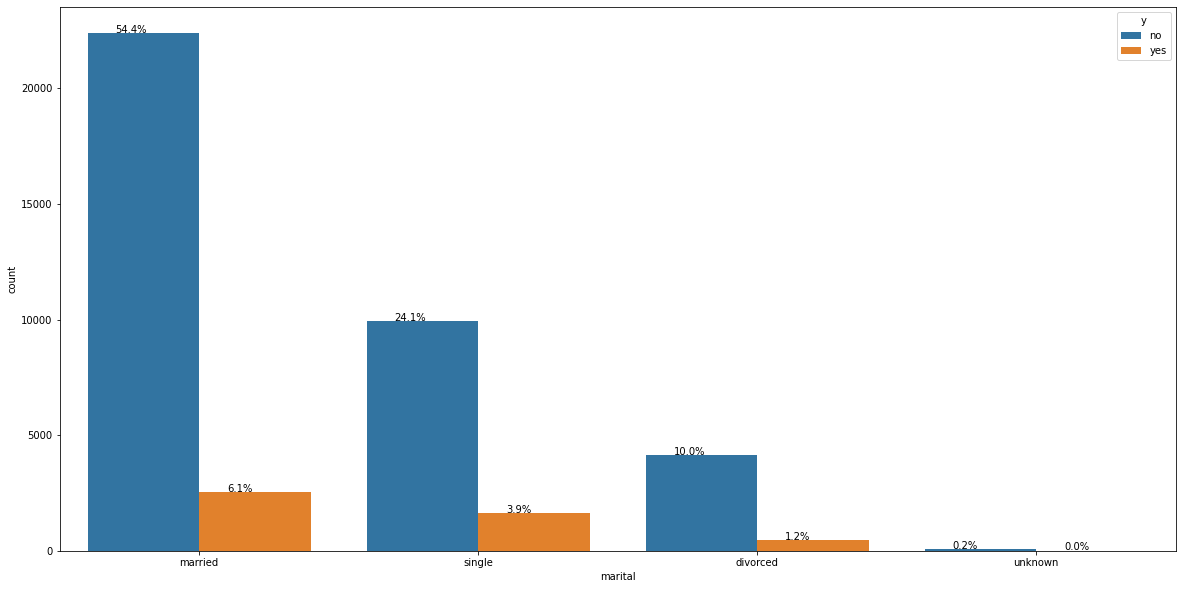

In [566]:
countplot_withYN("marital", data)

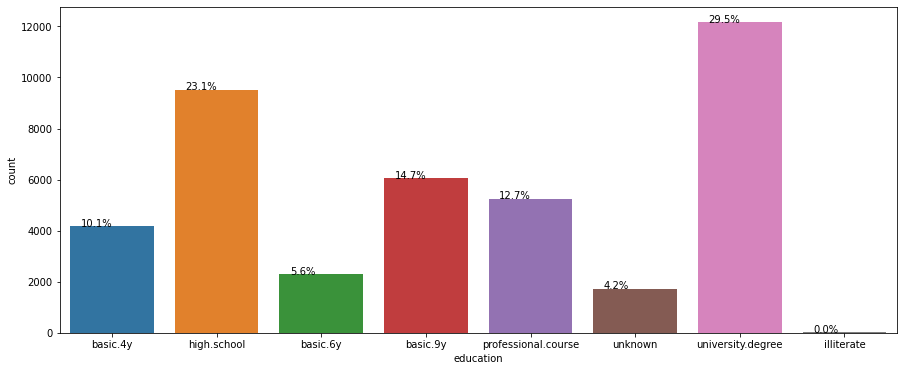

In [567]:
countplot("education",data)

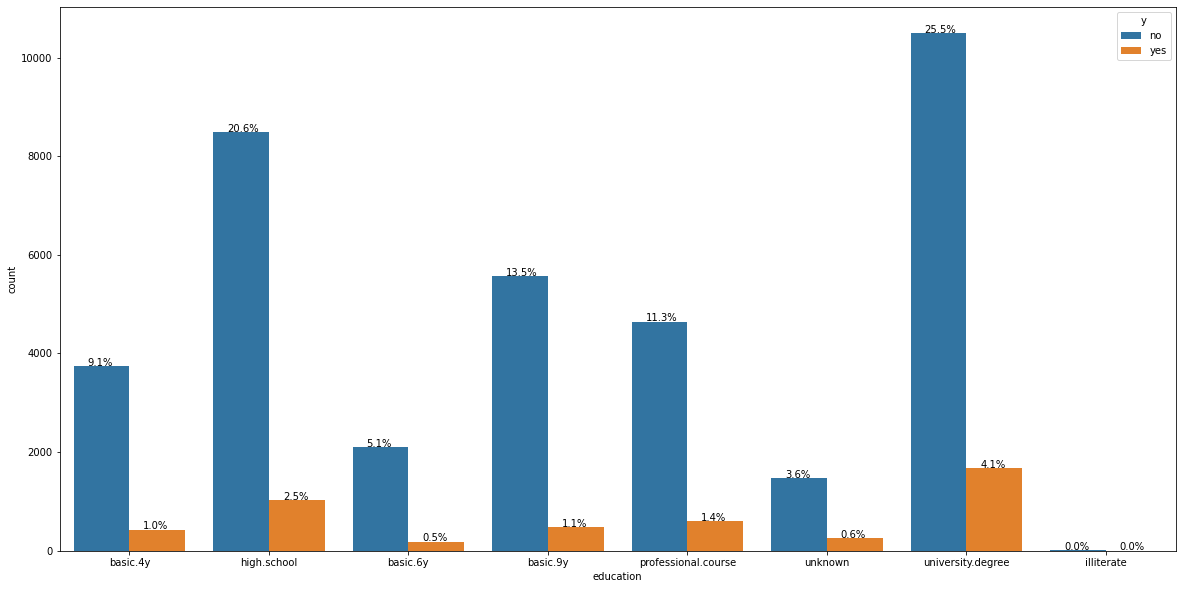

In [568]:
countplot_withYN("education", data)

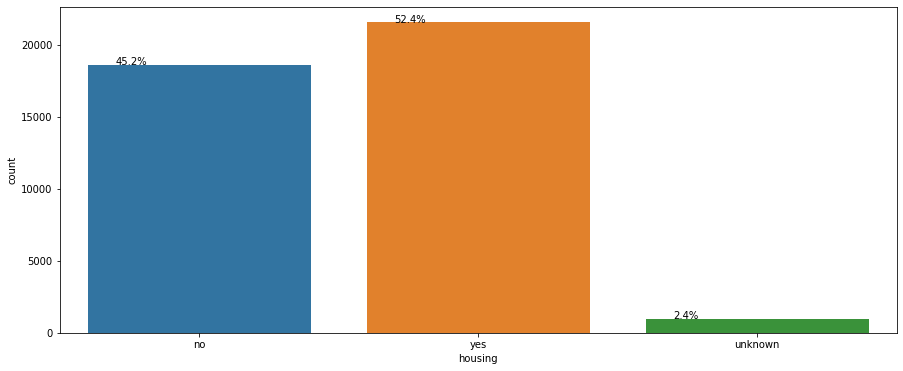

In [569]:
countplot("housing", data)

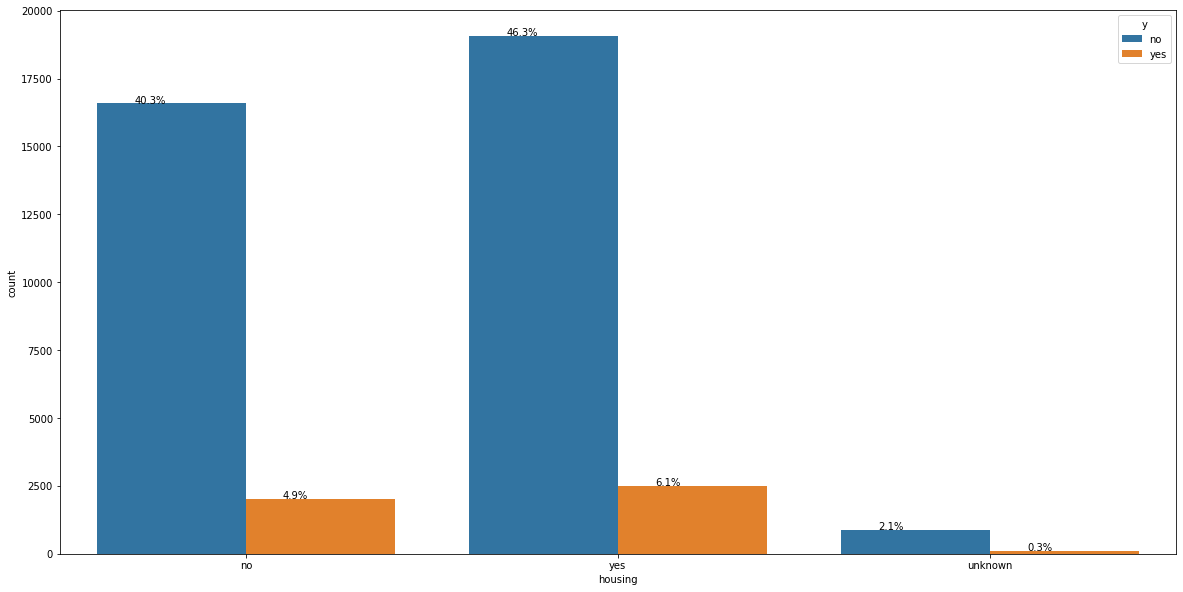

In [570]:
countplot_withYN("housing", data)

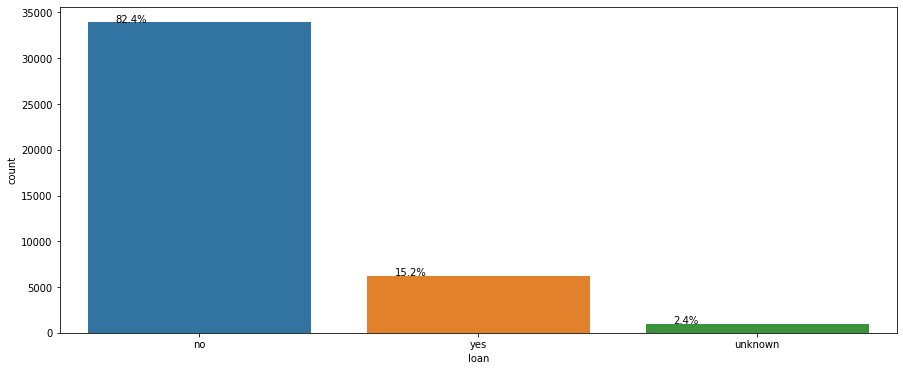

In [571]:
countplot("loan", data)

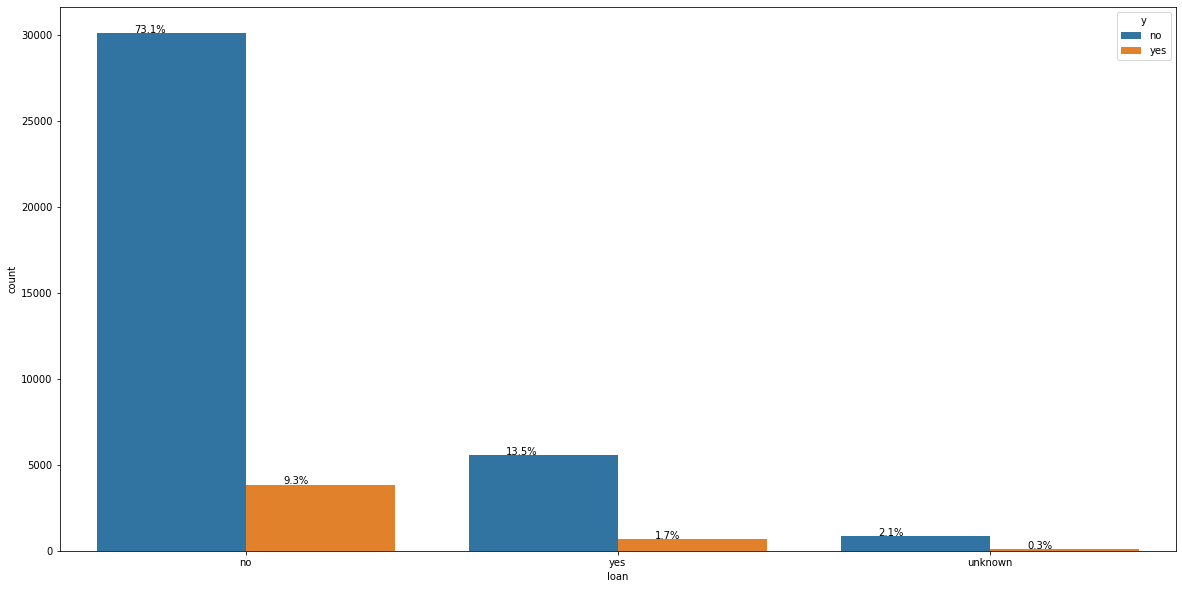

In [572]:
countplot_withYN("loan", data)

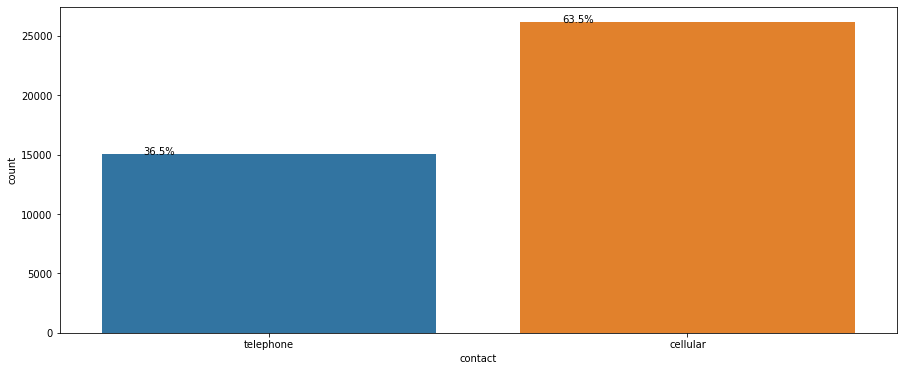

In [573]:
countplot("contact", data)

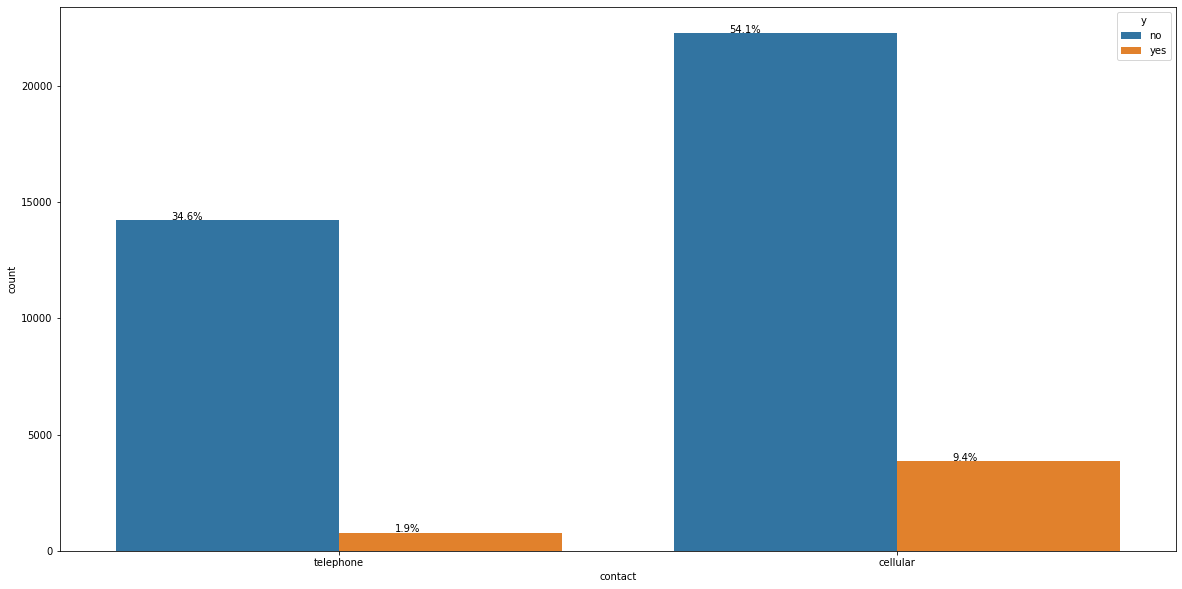

In [574]:
countplot_withYN("contact", data)

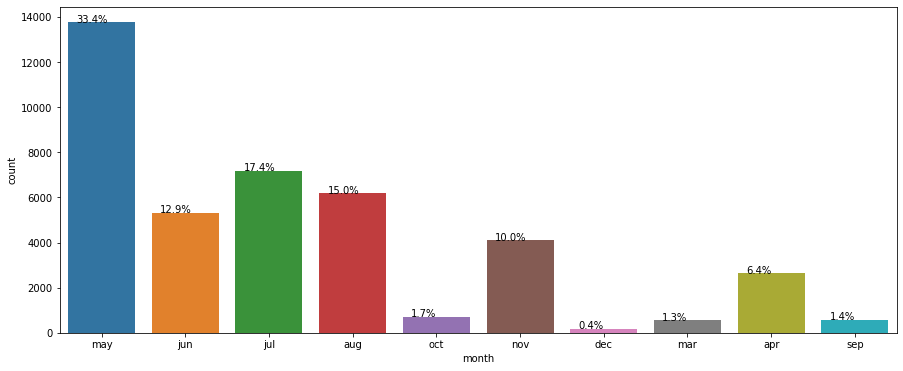

In [575]:
countplot("month", data)

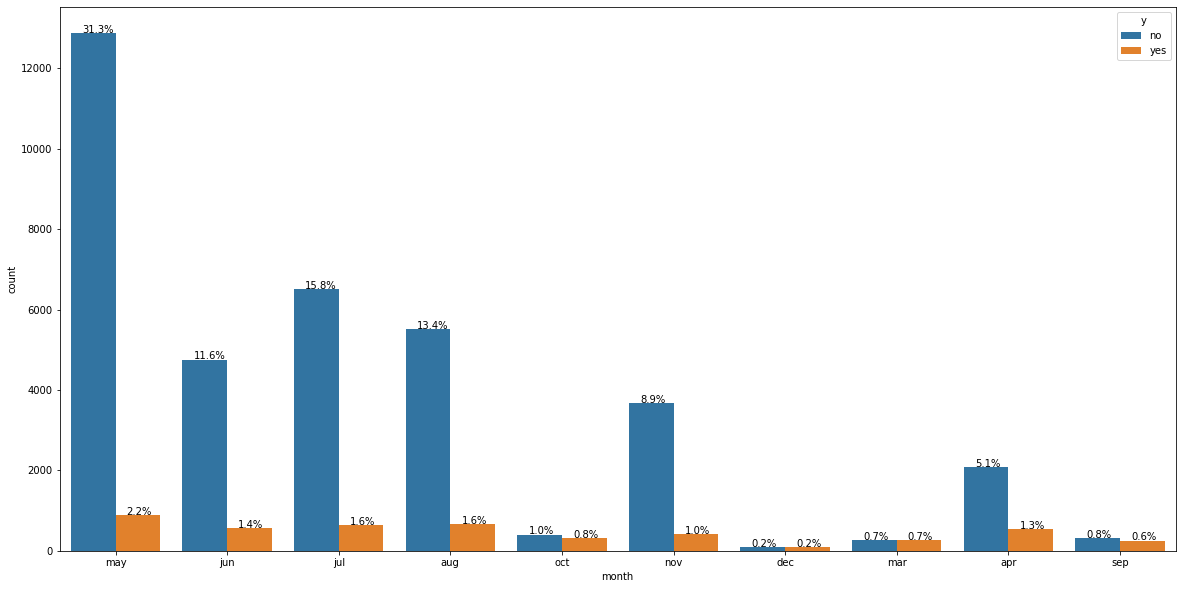

In [576]:
countplot_withYN("month", data)

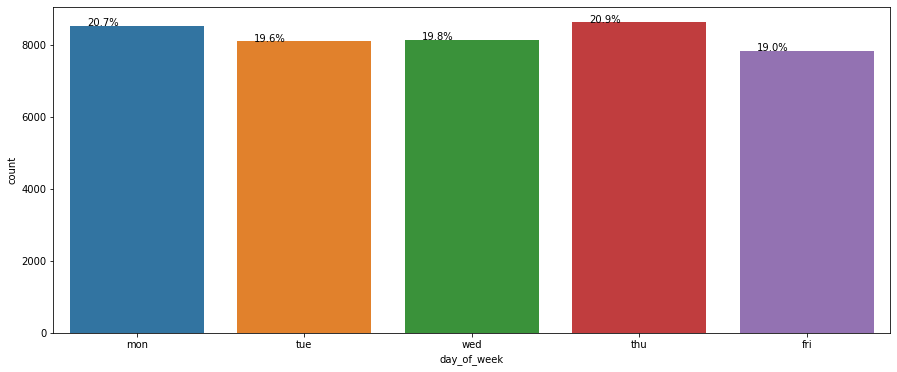

In [577]:
countplot("day_of_week", data)

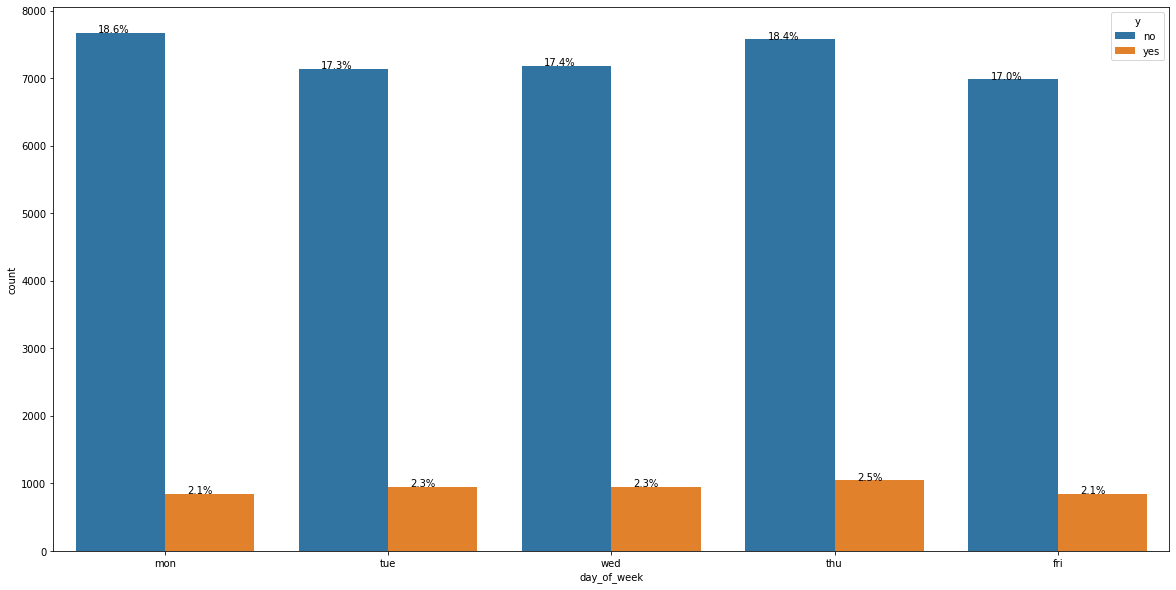

In [578]:
countplot_withYN("day_of_week", data)

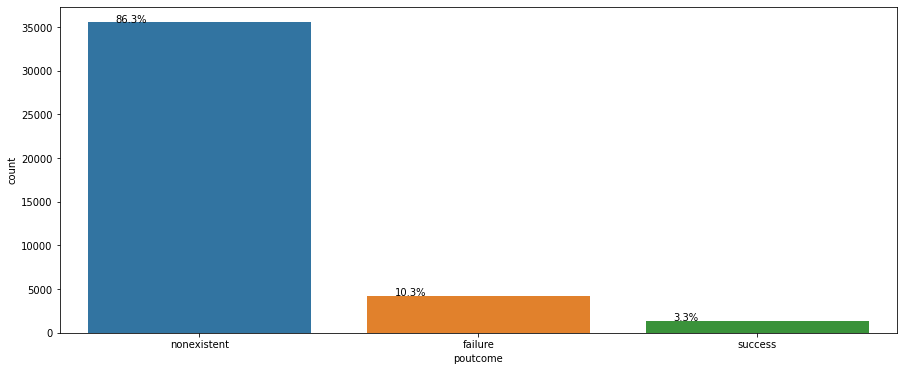

In [579]:
countplot("poutcome", data)

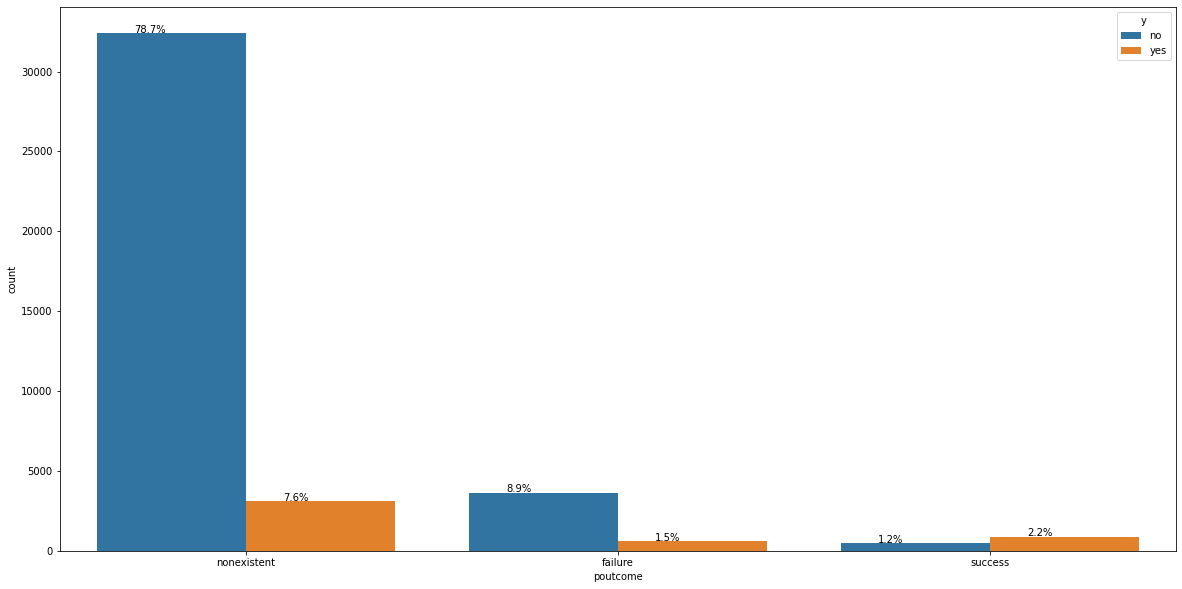

In [580]:
countplot_withYN("poutcome", data)

For age as a feature

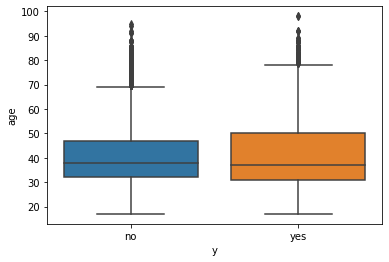

In [581]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="age")
plt.show()

Age seems to have a specific range with heavy overlap but does not come off as a good feature s indicator to the subscription.

For duration as a feature

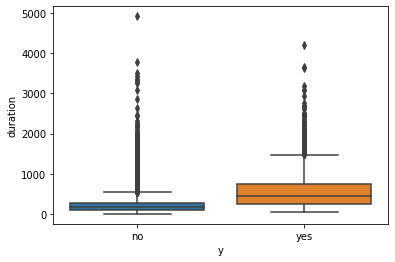

In [582]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="duration")
plt.show()

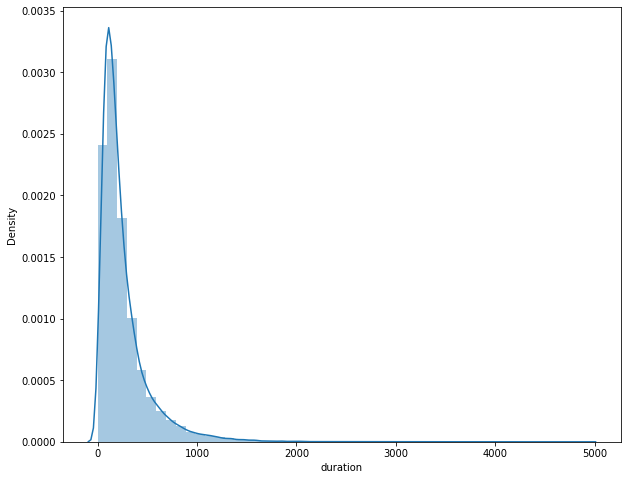

In [583]:
plt.figure(figsize=(10,8))
sns.distplot(data["duration"])
plt.show()

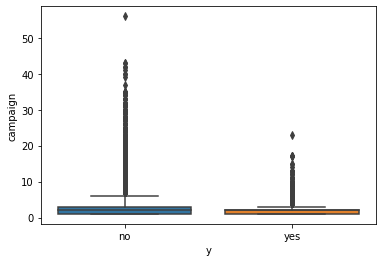

In [584]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="campaign")
plt.show()

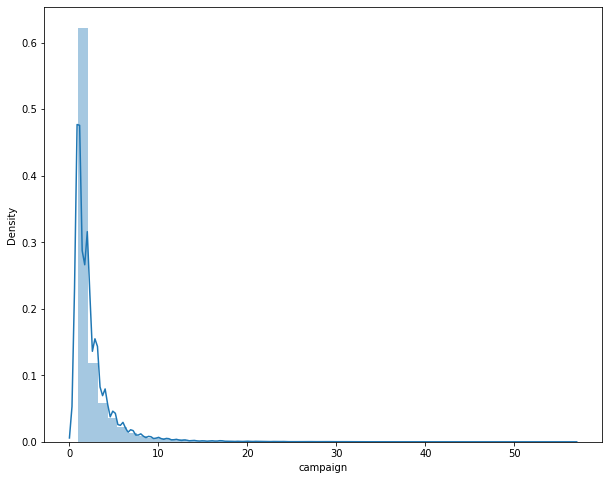

In [585]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["campaign"])
plt.show()

In [586]:
data["pdays"].value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

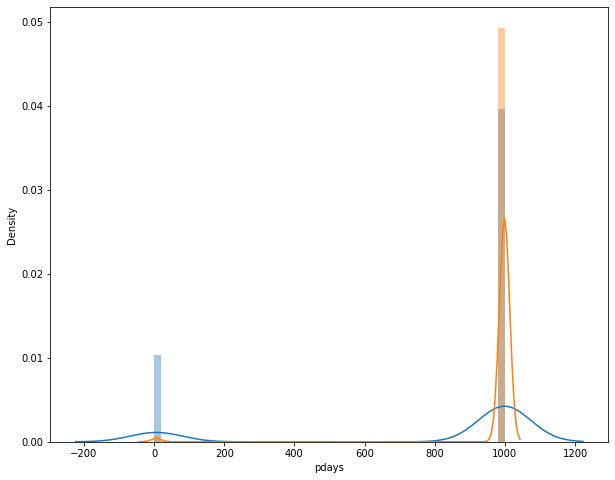

In [587]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["y"]=="yes"]["pdays"])
sns.distplot(data[data["y"]=="no"]["pdays"])
plt.show()

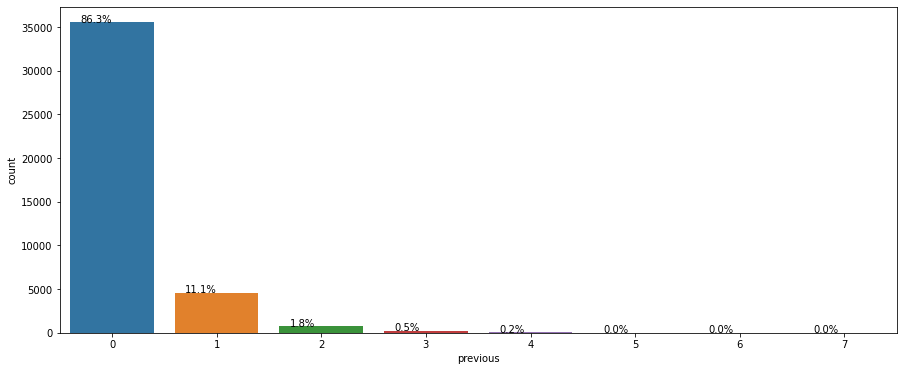

In [588]:
countplot("previous", data)

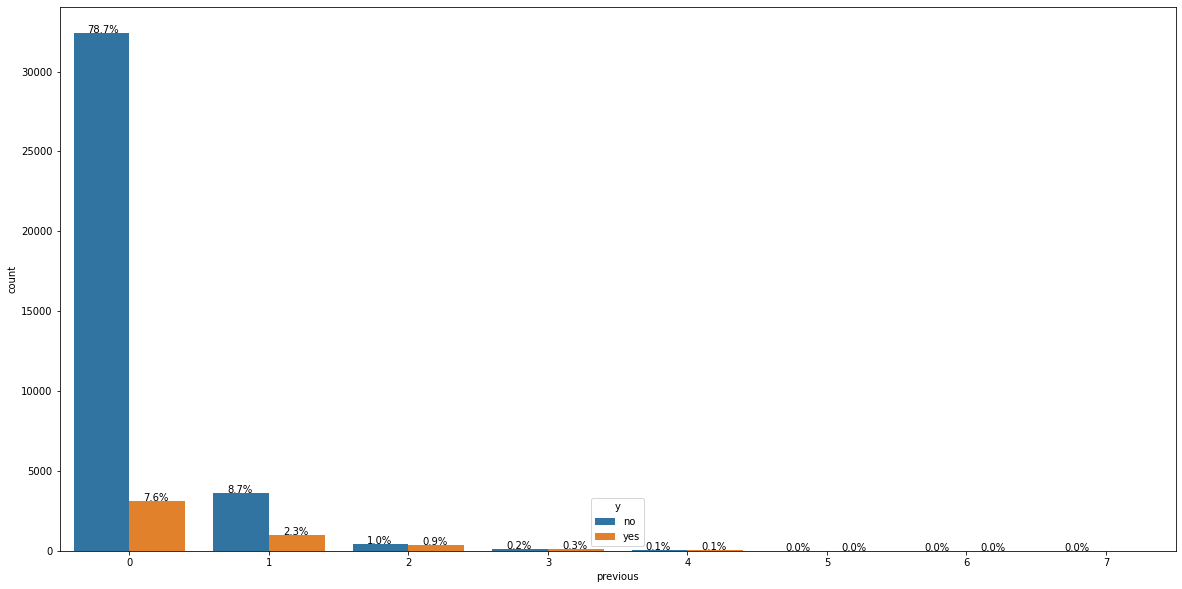

In [589]:
countplot_withYN("previous", data)

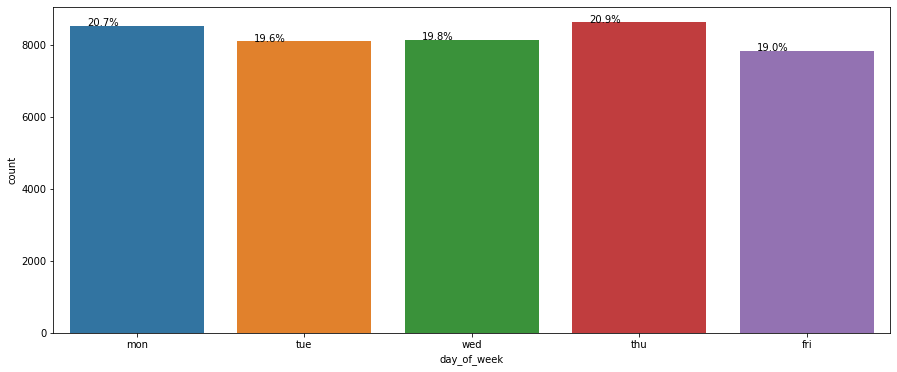

In [590]:
countplot("day_of_week", data)

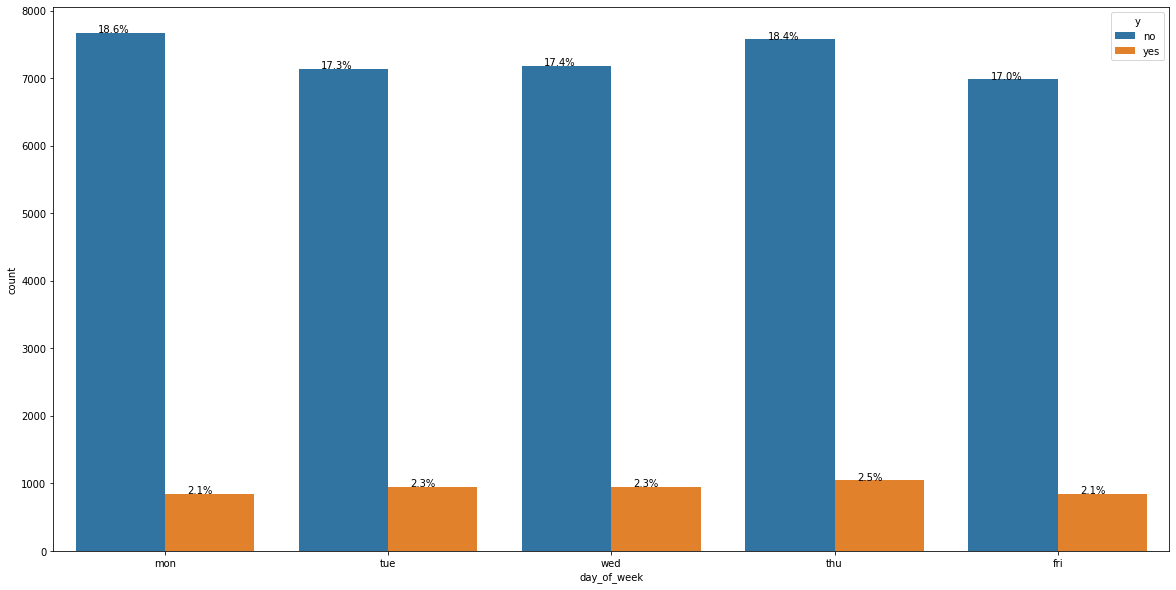

In [591]:
countplot_withYN("day_of_week", data)

Day of Week seems uninteresting, all balanced ratios.

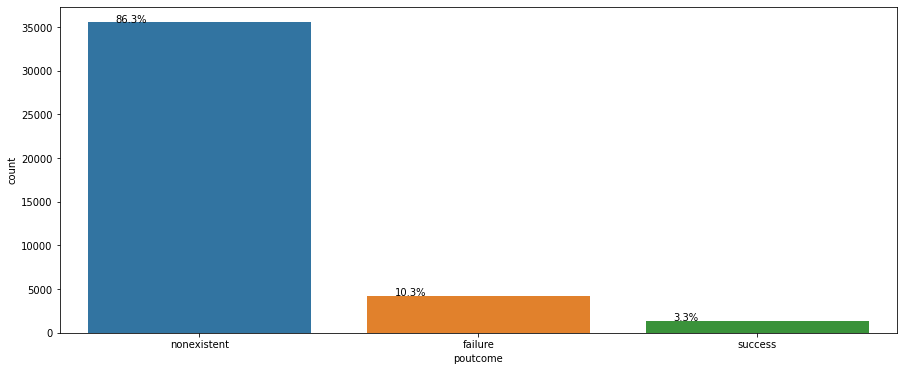

In [592]:
countplot("poutcome", data)

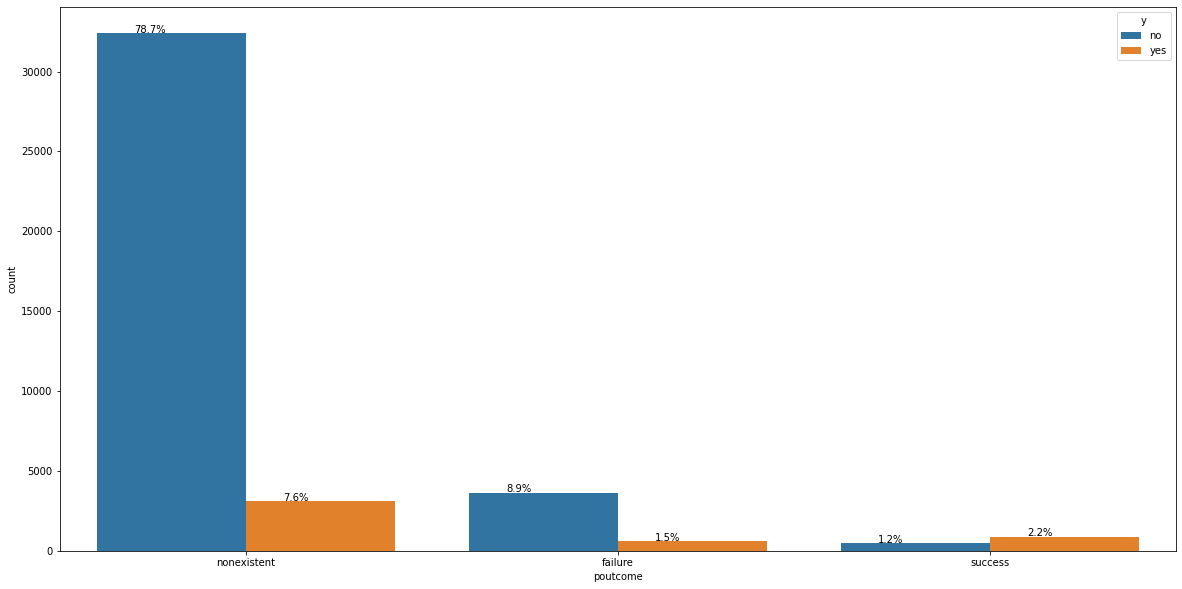

In [593]:
countplot_withYN("poutcome", data)

<Figure size 576x360 with 0 Axes>

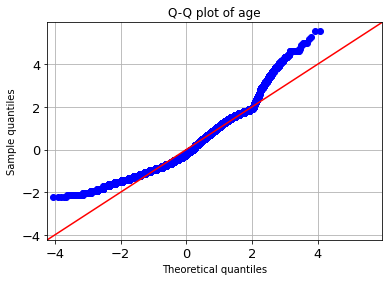

<Figure size 576x360 with 0 Axes>

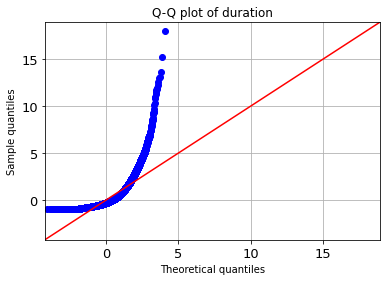

<Figure size 576x360 with 0 Axes>

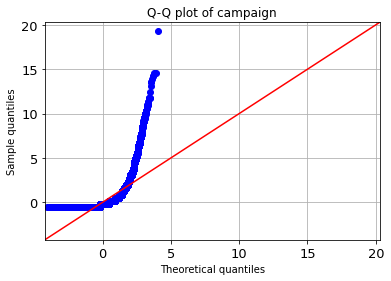

<Figure size 576x360 with 0 Axes>

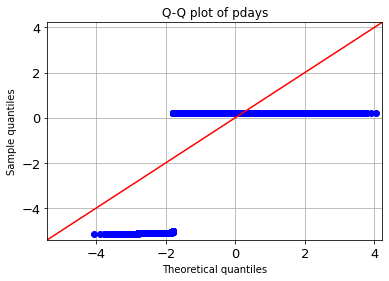

<Figure size 576x360 with 0 Axes>

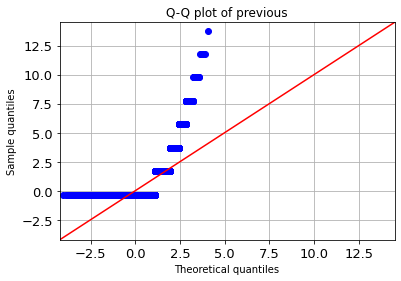

<Figure size 576x360 with 0 Axes>

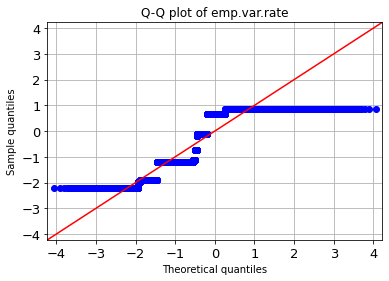

<Figure size 576x360 with 0 Axes>

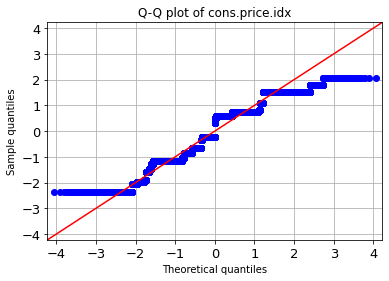

<Figure size 576x360 with 0 Axes>

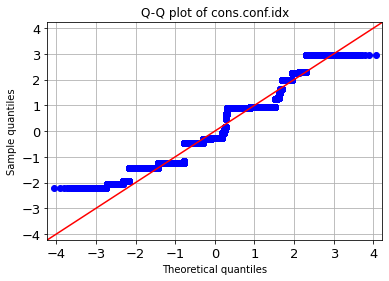

<Figure size 576x360 with 0 Axes>

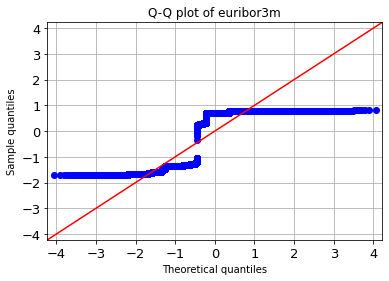

<Figure size 576x360 with 0 Axes>

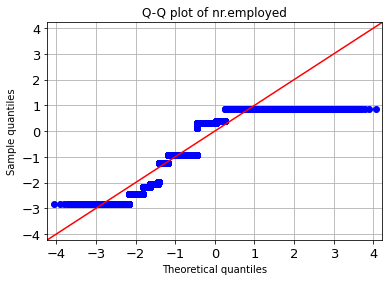

In [594]:
#QQ Plot

from statsmodels.graphics.gofplots import qqplot
data_norm=data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx','euribor3m', 'nr.employed']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=10)
  plt.ylabel("Sample quantiles",fontsize=10)
  plt.title("Q-Q plot of {}".format(c),fontsize=12)
  plt.grid(True)
  plt.show()

In [595]:
#OLS

import statsmodels.api as sm

model = sm.OLS(data['age'], data[['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx','euribor3m', 'nr.employed']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    age   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                          6.883e+04
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                        0.00
Time:                        04:53:15   Log-Likelihood:                     -1.5455e+05
No. Observations:               41176   AIC:                                  3.091e+05
Df Residuals:                   41167   BIC:                                  3.092e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
duration       -3.109e-05      0.000     -0.158      0.875      -0.000       0.000
campaign           0.0429      0.019      2.297      0.022       0.006       0.079
pdays             -0.0001      0.000     -0.398      0.691      -0.001       0.001
previous           0.4261      0.137      3.104      0.002       0.157       0.695
emp.var.rate      -0.7235      0.174     -4.161      0.000      -1.064      -0.383
cons.price.idx     0.6483      0.082      7.944      0.000       0.488       0.808
cons.conf.idx      0.2904      0.014     21.346      0.000       0.264       0.317
euribor3m          0.4690      0.191      2.460      0.014       0.095       0.843
nr.employed       -0.0020      0.002     -1.269      0.204      -0.005       0.001
==============================================================================
Omnibus:                     3141.660   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3992.472
Skew:                           0.700   Prob(JB):                         0.00
Kurtosis:                       3.605   Cond. No.                     2.69e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Plotting a correlation matrix for the above plotted features

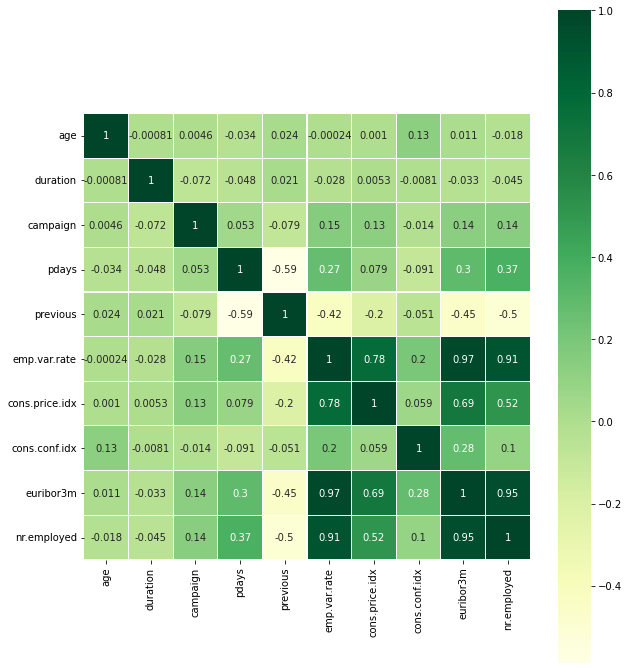

In [596]:
%matplotlib inline
corr = data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)


From the heatmap above, we can see that a few of the features share a very high correlation(the ones that are deep green), like "euribor3m and emp.var.rate" and "euribor3m and nr.employed", seems like these three features will play an important role in our predictive analysis.

## **Pre-processing**

In [597]:
data_x = data.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = data["y"]
print("Shape of Y:", data_y.shape)

Shape of X: (41176, 20)
Shape of Y: (41176,)


In [598]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)


In [600]:
y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

## **One HOT Encoding**

In [601]:
# Mask Categorical features
categorical_feature_mask = data_x.dtypes==object

# Turning to list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()

In [602]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [603]:
from sklearn.feature_extraction.text import CountVectorizer

def onehot(sparse, df, vectorizer, name):
  for i, col in enumerate(vectorizer.get_feature_names()):
    columnname = name+"_"+col
    df[columnname] = sparse[:, i].toarray().ravel().tolist()
  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Training data set config
    tempcolumns = Vectorizer.fit_transform(X_train[i])
    X_train = onehot(tempcolumns, X_train, Vectorizer, i)
    # Test Validation config
    tempcolumns = Vectorizer.transform(X_test[i])
    X_test = onehot(tempcolumns, X_test, Vectorizer, i)
    # Cross Validation config
    if include_cv:
      tempcolumns = Vectorizer.transform(X_cv[i])
      X_cv = onehot(tempcolumns, X_cv, Vectorizer, i)


In [604]:
OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)



Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome


In [605]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26352 entries, 21152 to 5026
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            26352 non-null  int64  
 1   duration                       26352 non-null  int64  
 2   campaign                       26352 non-null  int64  
 3   pdays                          26352 non-null  int64  
 4   previous                       26352 non-null  int64  
 5   emp.var.rate                   26352 non-null  float64
 6   cons.price.idx                 26352 non-null  float64
 7   cons.conf.idx                  26352 non-null  float64
 8   euribor3m                      26352 non-null  float64
 9   nr.employed                    26352 non-null  float64
 10  job_admin.                     26352 non-null  int64  
 11  job_blue-collar                26352 non-null  int64  
 12  job_entrepreneur               26352 non-nu

In [606]:
data_x.to_csv("encoded_data_x.csv")
data_y.to_csv("data_y.csv")

## **Logistic Regression**

AUC for k =  1e-05 is 0.8873064410187181
AUC for k =  0.0001 is 0.9197079513866208
AUC for k =  0.001 is 0.9229560861076636
AUC for k =  0.01 is 0.921895299424449
AUC for k =  0.1 is 0.9231230176874894
AUC for k =  1 is 0.922585479855713
AUC for k =  10 is 0.9222107910379513
AUC for k =  100 is 0.921225985440663
AUC for k =  1000 is 0.9230257165356617


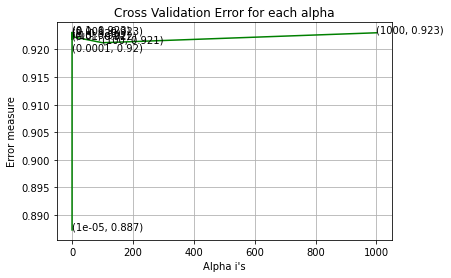

For values of best alpha =  0.1 Train AUC: 0.930176974553324
For values of best alpha =  0.1 Test AUC: 0.927964055562403
For values of best alpha =  0.1 Cross Validation AUC: 0.9231230176874894


In [607]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])
best_alpha = np.argmax(cv_auc_array)
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "Train AUC:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "Test AUC:",roc_auc_score(y_test, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "Cross Validation AUC:",roc_auc_score(y_cv, predict_y[:,1]))


Now, we are getting max iteration warnings above but that's a scikit thing,Scikit-Learn API sometimes provides the user the option to specify the maximum number of iterations the algorithm should take while it's searching for the solution in an iterative manner, which is by default 100, and  increasing the maximum number of iterations does not necessarily affect the results. I can add iterations and the warning will go away, but I'd like to keep it this way as it can be used a reference to a warning that's not talked about as much.

(All the results are in between the warnings without any erros)

## **Imputations**

In [608]:
# Funtion to create % of missing data
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

Mean Method:

In [609]:
from sklearn.metrics import mean_squared_error

# Imputing data to analyse influence on variables
data['age_1_percent'] = data[['age']].copy(deep=True)
data['age_5_percent'] = data[['age']].copy(deep=True)
data['age_10_percent'] = data[['age']].copy(deep=True)

# Create missing data
create_missing(data, 0.01, 'age_1_percent')
create_missing(data, 0.05, 'age_5_percent')
create_missing(data, 0.1, 'age_10_percent')

# Verify % of missing data
print(data[['age', 'age_1_percent', 'age_5_percent', 'age_10_percent']].isnull().sum() * 100 / len(data))

# Replace missing values with mean
mean = data['age'].mean(axis = 0)
data.fillna(value=mean, inplace = True)
print('Mean =', mean)

# Calculating Mean Square Error
mse1 = mean_squared_error(data['age_1_percent'], data['age'], squared = False)
mse5 = mean_squared_error(data['age_5_percent'], data['age'], squared = False)
mse10 = mean_squared_error(data['age_10_percent'], data['age'], squared = False)

rmse = [mse1, mse5, mse10]
for err in rmse:
  print('rmse = ' + str(round(err, 2)))

age                0.000000
age_1_percent      1.000583
age_5_percent      5.000486
age_10_percent    10.000971
dtype: float64
Mean = 40.02380027200311
rmse = 0.96
rmse = 2.38
rmse = 3.22


Mode Method:

In [610]:
from sklearn.metrics import mean_squared_error

# Imputing data to analyse influence on variables
data['age_1_percent'] = data[['age']].copy(deep=True)
data['age_5_percent'] = data[['age']].copy(deep=True)
data['age_10_percent'] = data[['age']].copy(deep=True)

# Create missing data
create_missing(data, 0.01, 'age_1_percent')
create_missing(data, 0.05, 'age_5_percent')
create_missing(data, 0.1, 'age_10_percent')

# Verify % of missing data
print(data[['age', 'age_1_percent', 'age_5_percent', 'age_10_percent']].isnull().sum() * 100 / len(data))

# Replace missing values with mean
mean = data['age'].median(axis = 0)
data.fillna(value=mean, inplace = True)
print('Median =', mean)

# Calculating Mean Square Error
mse1 = mean_squared_error(data['age_1_percent'], data['age'], squared = False)
mse5 = mean_squared_error(data['age_5_percent'], data['age'], squared = False)
mse10 = mean_squared_error(data['age_10_percent'], data['age'], squared = False)

rmse = [mse1, mse5, mse10]
for err in rmse:
  print('rmse = ' + str(round(err, 2)))

age                0.000000
age_1_percent      1.000583
age_5_percent      5.000486
age_10_percent    10.000971
dtype: float64
Median = 38.0
rmse = 0.97
rmse = 2.43
rmse = 3.35


KNN Method:

In [611]:
from sklearn.impute import KNNImputer

# Imputing data to analyse influence on variables
data['age_1_percent'] = data[['age']].copy(deep=True)
data['age_5_percent'] = data[['age']].copy(deep=True)
data['age_10_percent'] = data[['age']].copy(deep=True)

# Create missing data
create_missing(data, 0.01, 'age_1_percent')
create_missing(data, 0.05, 'age_5_percent')
create_missing(data, 0.1, 'age_10_percent')

# Verify % of missing data
print(data[['age', 'age_1_percent', 'age_5_percent', 'age_10_percent']].isnull().sum() * 100 / len(data))
temp = data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx','euribor3m', 'nr.employed']]
neighbours = 5
knn = KNNImputer(n_neighbors = neighbours)
data1 = pd.DataFrame(knn.fit_transform(temp), columns = temp.columns)

age                0.000000
age_1_percent      1.000583
age_5_percent      5.000486
age_10_percent    10.000971
dtype: float64


# **Conclusion**

The AUC values for Linear regression executed after One hot encoding features  came out to average around 93%.

Which looks pretty good, and we also got a good idea of which features were the most important based on predictibality, which are:

*   nr.employed
*   emp.var.rate
*   poutcome_success
*   euribor3m









* Which independent variables are useful to predict a target (dependent variable)?

nr.employed, emp.var.rate and euribor3m are three closely interdependent features with correlations in combiantions as high as 97% which added to the yes or no prediction heavily with, hence, being a multicolinearity plotted with heat maps and different comparative charts above. With rankings of the feature that go as following:
nr.employed
emp.var.rate
poutcome_success
euribor3m


* Which independent variable have missing data? How much? 
There was no missing data.

* Do the training and test sets have the same data?
Taken from the same dataset but divided over time of 2 years, hence gave enough variance across a period of time to be tested and have meaningful results.

* In the predictor variables independent of all the other predictor variables?

Varies, some of the features were completely independent whereas some had high multicolinearity as seen in the heat map and Q-Q plots.

* Which predictor variables are the most important?

In ranking:

nr.employed
emp.var.rate
poutcome_success
euribor3m


* Do the ranges of the predictor variables make sense?

The ranges did make sense for most features like age but period of time like days, weeks and. months as that was an expected change and moved periodically, but did not add to the prediction state of matter.

* What are the distributions of the predictor variables? 

The column y which had Y or N as an output was havily imbalanced with a difference of 8x the number, which was the goal to be predicted. The predictor variables which added the highest importance had heavily multi-colinearity and were distributed similarly, but some that were distributed too evenly across days like the week.

# **References**



S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS.

https://medium.com/swlh/exploratory-data-analysis-on-the-bank-marketing-data-set-with-pandas-and-seaborn-72e5c05e0076





---



**Data Source:**

https://archive.ics.uci.edu/ml/datasets/bank+marketing

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014



---



MIT License

Copyright (c) 2023 Varadmurty Mohod

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.